In [ ]:
# Import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
# Import Data

df = pd.read_excel('Safe_Simulated_Snow_Data.xlsx')
df.rename(columns = {'Temp High (°F)':'Temp High', 'Temp Low (°F)':'Temp Low', 'Temp High (°F)':'Temp High', 'Snowfall (inches)':'Snowfall', 'Wind (mph)':'Wind',}, inplace = True)  # Renaming columns 
print(df.head())
# sns.countplot(df['heart disease'])
# plt.title('Value counts of heart disease patients')
# plt.show()

   Temp High  Temp Low  Snowfall  Wind          Skies  Score
0       46.4      32.3       0.0  13.1          Rainy     32
1       27.5      27.5       0.0   2.1         Cloudy     55
2       35.8      24.6       0.0   6.4  Partly Cloudy     50
3       60.8      58.2       0.0   9.6          Rainy      8
4       41.2      25.5       0.0  13.1          Rainy     36


In [29]:
# Data Cleaning and Transformation
df_encoded = pd.get_dummies(df, columns=['Skies'])
df_encoded.head()

,Temp High,Temp Low,Snowfall,Wind,Score,Skies_Cloudy,Skies_Partly Cloudy,Skies_Rainy,Skies_Snowy,Skies_Sunny
0,46.4,32.3,0.0,13.1,32,False,False,True,False,False
1,27.5,27.5,0.0,2.1,55,True,False,False,False,False
2,35.8,24.6,0.0,6.4,50,False,True,False,False,False
3,60.8,58.2,0.0,9.6,8,False,False,True,False,False
4,41.2,25.5,0.0,13.1,36,False,False,True,False,False


In [30]:
# EDA
df_encoded.describe()  # Key Stats

,Temp High,Temp Low,Snowfall,Wind,Score
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,29.203333,19.172222,2.284444,10.003333,58.833333
std,10.225364,12.054399,3.340454,4.363702,20.466607
min,5.300000,-4.300000,0.000000,1.700000,8.000000
25%,21.775000,11.000000,0.000000,6.950000,45.000000
50%,29.000000,18.450000,0.000000,9.800000,50.000000
75%,35.625000,26.825000,4.000000,13.100000,77.750000
max,60.800000,58.200000,15.200000,20.100000,100.000000


<Axes: xlabel='Snowfall', ylabel='Score'>

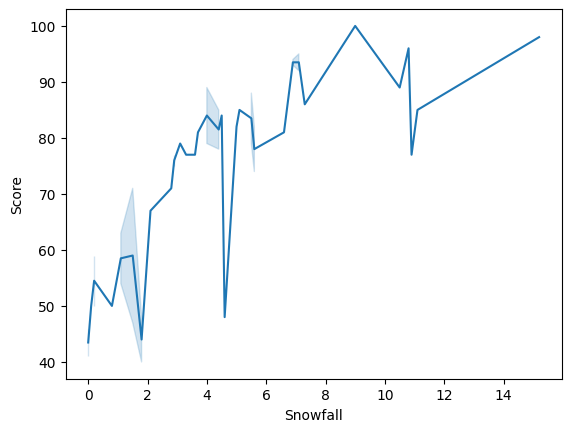

In [31]:
# Plotting
sns.lineplot(data=df, x="Snowfall", y="Score")


<Axes: xlabel='Wind', ylabel='Score'>

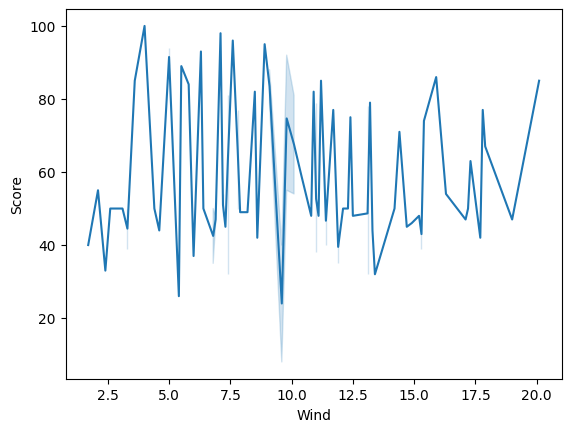

In [32]:
sns.lineplot(data=df, x="Wind", y="Score")

<Axes: xlabel='Skies', ylabel='Score'>

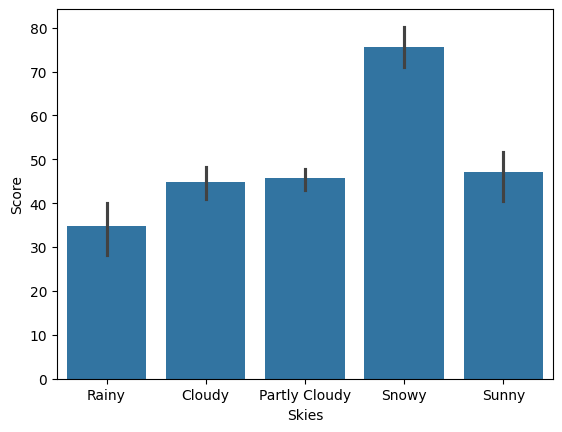

In [33]:
sns.barplot(data=df, x="Skies", y="Score")

In [39]:
# Model Building 1: Random Forest
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df_encoded.drop('Score',axis=1)
# Putting response variable to y
y = df_encoded['Score']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((62, 9), (28, 9))

In [81]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=2,
                                       n_estimators=50, oob_score=True)


In [82]:
# Fit Model
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=42)

In [83]:
# Check OOB score
classifier_rf.oob_score_

0.1935483870967742

In [85]:
# Hyperparameters Tuning
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


C:\Users\jay00\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [86]:
grid_search.best_score_

0.22499999999999998

In [87]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [92]:
# Model 2: Linear Regression
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(X, y)
print(linear_model.coef_)
r_sq = linear_model.score(X, y)
print(f"coefficient of determination: {r_sq}")


[ -0.0182287    0.15809232   3.23506441  -0.56517527  -2.1866002
  -1.12021059 -13.85229799  15.59218923   1.56691956]
coefficient of determination: 0.8219131758952418


In [96]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LinearRegression

# Assuming X and y are already defined
best_lrmodel = LinearRegression()

# Define the feature selector
efs = EFS(best_lrmodel, 
          min_features=1, 
          max_features=len(X.columns), 
          scoring='r2', 
          print_progress=True, 
          cv=5)  # Change cv depending on your data

# Fit the model
efs = efs.fit(X, y)

# Best subset of features
best_feature_subset = list(efs.best_feature_names_)
print(best_feature_subset)


C:\Users\jay00\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\jay00\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\jay00\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\jay00\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\U

['Snowfall', 'Wind', 'Skies_Rainy', 'Skies_Snowy']


In [98]:
# Fit the model with the best subset of features
best_lrmodel.fit(X[best_feature_subset], y)
r_sq_b = best_lrmodel.score(X[best_feature_subset], y)
print(f"coefficient of determination: {r_sq_b}")
# Now 'model' is the Linear Regression model fitted with the best subset of features

coefficient of determination: 0.815191910166965
